## Testing Python Tools for importing GPR Data

## Package obspy

In [31]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))
from config import *

from obspy.io.segy.segy import _read_segy
import numpy as np
import matplotlib.pyplot as plt
st = _read_segy(TEST_FILE_DIR / "UG3DQUERUNTERZUG.SGY")




## get the Header Information

In [22]:
binary_header = st.binary_file_header
print(binary_header)

Binary File Header:
	job_identification_number: 0
	line_number: 0
	reel_number: 0
	number_of_data_traces_per_ensemble: 1
	number_of_auxiliary_traces_per_ensemble: 0
	sample_interval_in_microseconds: 49
	sample_interval_in_microseconds_of_original_field_recording: 0
	number_of_samples_per_data_trace: 400
	number_of_samples_per_data_trace_for_original_field_recording: 0
	data_sample_format_code: 3
	ensemble_fold: 1
	trace_sorting_code: 0
	vertical_sum_code: 0
	sweep_frequency_at_start: 0
	sweep_frequency_at_end: 0
	sweep_length: 0
	sweep_type_code: 0
	trace_number_of_sweep_channel: 0
	sweep_trace_taper_length_in_ms_at_start: 0
	sweep_trace_taper_length_in_ms_at_end: 0
	taper_type: 0
	correlated_data_traces: 0
	binary_gain_recovered: 0
	amplitude_recovery_method: 0
	measurement_system: 1
	impulse_signal_polarity: 0
	vibratory_polarity_code: 0
	unassigned_1: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [17]:
for i, tr in enumerate(st.traces[:90]):  # z. B. erste 10 Traces
    print(
        f"Trace {i+1}: "
        f"X={tr.header.source_coordinate_x}, "
        f"Y={tr.header.source_coordinate_y}"
    )


Trace 1: X=0, Y=0
Trace 2: X=0, Y=0
Trace 3: X=0, Y=0
Trace 4: X=0, Y=0
Trace 5: X=0, Y=0
Trace 6: X=0, Y=0
Trace 7: X=0, Y=0
Trace 8: X=0, Y=0
Trace 9: X=0, Y=0
Trace 10: X=0, Y=0
Trace 11: X=0, Y=0
Trace 12: X=0, Y=0
Trace 13: X=0, Y=0
Trace 14: X=0, Y=0
Trace 15: X=0, Y=0
Trace 16: X=0, Y=0
Trace 17: X=0, Y=0
Trace 18: X=0, Y=0
Trace 19: X=0, Y=0
Trace 20: X=0, Y=0
Trace 21: X=0, Y=0
Trace 22: X=0, Y=0
Trace 23: X=0, Y=0
Trace 24: X=0, Y=0
Trace 25: X=0, Y=0
Trace 26: X=0, Y=0
Trace 27: X=0, Y=0
Trace 28: X=0, Y=0
Trace 29: X=0, Y=0
Trace 30: X=0, Y=0
Trace 31: X=0, Y=0
Trace 32: X=0, Y=0
Trace 33: X=0, Y=0
Trace 34: X=0, Y=0
Trace 35: X=0, Y=0
Trace 36: X=0, Y=0
Trace 37: X=0, Y=0
Trace 38: X=0, Y=0
Trace 39: X=0, Y=0
Trace 40: X=0, Y=0
Trace 41: X=0, Y=0
Trace 42: X=0, Y=0
Trace 43: X=0, Y=0
Trace 44: X=0, Y=0
Trace 45: X=0, Y=0
Trace 46: X=0, Y=0
Trace 47: X=0, Y=0
Trace 48: X=0, Y=0
Trace 49: X=0, Y=0
Trace 50: X=0, Y=0
Trace 51: X=0, Y=0
Trace 52: X=0, Y=0
Trace 53: X=0, Y=0
Tr

In [11]:
trace_headers = st.traces[0].header
print(trace_headers)

trace_sequence_number_within_line: 1
trace_sequence_number_within_segy_file: 1
original_field_record_number: 1
trace_number_within_the_original_field_record: 1
energy_source_point_number: 1
ensemble_number: 1
trace_number_within_the_ensemble: 0
trace_identification_code: 1
number_of_vertically_summed_traces_yielding_this_trace: 0
number_of_horizontally_stacked_traces_yielding_this_trace: 0
data_use: 0
distance_from_center_of_the_source_point_to_the_center_of_the_receiver_group: 0
receiver_group_elevation: 0
surface_elevation_at_source: 0
source_depth_below_surface: 0
datum_elevation_at_receiver_group: 0
datum_elevation_at_source: 0
water_depth_at_source: 0
water_depth_at_group: 0
scalar_to_be_applied_to_all_elevations_and_depths: 1
scalar_to_be_applied_to_all_coordinates: 1
source_coordinate_x: 0
source_coordinate_y: 0
group_coordinate_x: 0
group_coordinate_y: 0
coordinate_units: 0
weathering_velocity: 0
subweathering_velocity: 0
uphole_time_at_source_in_ms: 0
uphole_time_at_group_in_m

In [32]:
data = np.array([tr.data for tr in st.traces]).T  # Transpose für richtiges Orientieren

print(data.shape)  # (samples, traces)
dt = st.binary_file_header.sample_interval_in_microseconds / 1e6  # Sekunden
time = np.arange(data.shape[0]) * dt * 1e9  # in Nanosekunden (für GPR üblich)



(400, 42660)


In [33]:
data[:, 10]

array([ -7954, -14382, -21590, -18593, -11697,  -2634,   5107,  10469,
        13098,  11081,   9894,   7825,   4591,   -337,  -5724,  -9090,
        -8422,  -3653,   2283,   5213,   2760,  -3955, -10793, -13491,
       -10573,  -4151,   2466,   7238,  10706,  13617,  15462,  14045,
        10021,   4616,   -549,  -4340,  -7183, -10581, -15642, -20773,
       -21794, -15858,  -5007,   5889,  12844,  14211,  11213,   7196,
         5364,   6286,   8059,   8350,   5871,   1222,  -3653,  -7080,
        -8484,  -7888,  -6330,  -4828,  -3516,  -2699,  -2247,  -1589,
          300,   3969,   8224,   9996,   6571,  -1842, -11499, -16344,
       -11908,   -229,  11755,  17664,  16167,   9285,   1627,  -3414,
        -6054,  -8436, -11363, -13318, -12144,  -6712,   1343,   8037,
        10418,   8504,   4781,   2138,   1744,   2708,   3329,   2367,
         -255,  -3443,  -5652,  -6004,  -4266,  -1141,   1683,   2818,
         1958,    -56,  -1834,  -2000,     42,   3583,   7023,   8323,
      

In [40]:
import pandas as pd

# Erstelle eine Liste von Dictionaries – je Trace ein Eintrag
trace_info = []
for i, tr in enumerate(st.traces):
    trace_info.append({
        "trace_index": i,
        "source_x": tr.header.source_coordinate_x,
        "source_y": tr.header.source_coordinate_y,
        "group_x": tr.header.group_coordinate_x,
        "group_y": tr.header.group_coordinate_y,
        "trace_seq_line": tr.header.trace_sequence_number_within_line
    })

# In ein DataFrame umwandeln
df = pd.DataFrame(trace_info)
df.to_csv("traces.csv", index=False)
# Ergebnisse ansehen
print(df.head())


   trace_index  source_x  source_y  group_x  group_y  trace_seq_line
0            0         0         0        0        0               1
1            1         0         0        0        0               2
2            2         0         0        0        0               3
3            3         0         0        0        0               4
4            4         0         0        0        0               5


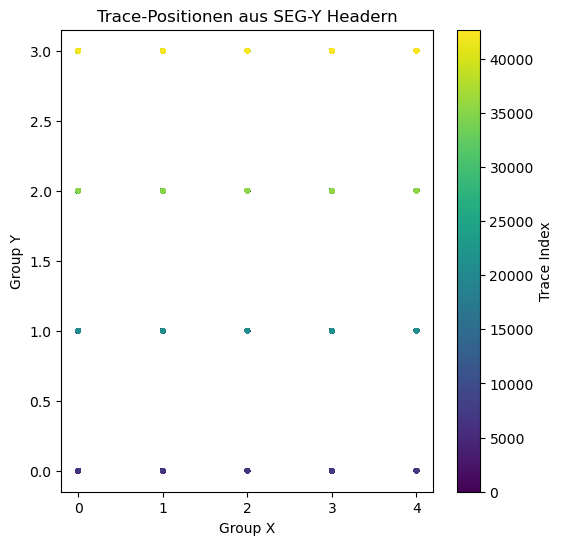

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(df["group_x"], df["group_y"], s=8, c=df.index, cmap="viridis")
plt.xlabel("Group X")
plt.ylabel("Group Y")
plt.title("Trace-Positionen aus SEG-Y Headern")
plt.colorbar(label="Trace Index")
plt.show()


In [42]:
# Runde Y-Koordinaten leicht (wegen numerischen Rauschens)
df["group_y_round"] = df["group_y"].round(3)

# Linien automatisch gruppieren
lines = df.groupby("group_y_round")

for y, line in lines:
    print(f"Line at Y={y:.3f} -> {len(line)} traces")


Line at Y=0.000 -> 7110 traces
Line at Y=1.000 -> 14220 traces
Line at Y=2.000 -> 14220 traces
Line at Y=3.000 -> 7110 traces


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

def show_trace(trace=0):
    fig, axs = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios':[3,1]})

    # --- Radargramm links ---
    axs[0].imshow(data, cmap="gray", aspect="auto",
                  extent=[0, data.shape[1], time[-1], time[0]])
    axs[0].axvline(trace, color="red", lw=2)
    axs[0].set_xlabel("Trace number")
    axs[0].set_ylabel("Time [ns]")
    axs[0].set_title("Radargram")

    # --- Aktueller Trace rechts ---
    axs[1].plot(data[:, trace], time, color="black")
    axs[1].invert_yaxis()
    axs[1].set_xlabel("Amplitude")
    axs[1].set_title(f"Trace {trace}")

    plt.tight_layout()
    plt.show()

interact(show_trace, trace=(0, data.shape[1]-1))


interactive(children=(IntSlider(value=0, description='trace', max=159191), Output()), _dom_classes=('widget-in…

<function __main__.show_trace(trace=0)>

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Beispiel: dein Radargramm
# data = np.array([tr.data for tr in st.traces]).T
# dt = st.binary_file_header.sample_interval_in_microseconds / 1e6
# time = np.arange(data.shape[0]) * dt * 1e9  # ns

# --- Parameter ---
window = 200  # Anzahl Traces im sichtbaren Fenster

def show_window(center=0):
    start = max(0, center - window//2)
    end = min(data.shape[1], center + window//2)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(
        data[:, start:end],
        cmap="gray",
        aspect="auto",
        extent=[start, end, time[-1], time[0]]
    )
    plt.xlabel("Trace number")
    plt.ylabel("Time [ns]")
    plt.title(f"Traces {start} – {end}")
    plt.show()

interact(show_window, center=(0, data.shape[1]-1))


interactive(children=(IntSlider(value=0, description='center', max=42659), Output()), _dom_classes=('widget-in…

<function __main__.show_window(center=0)>